In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


<frozen importlib._bootstrap>:228: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


In [4]:
df = pd.read_csv("fetal_health.csv")
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [6]:
df.shape

(2126, 22)

In [7]:
x = df.dropna()

In [8]:
x.shape

(2126, 22)

There are no nan values

In [14]:
# Get y value
y = df.pop("fetal_health")


In [18]:
y.value_counts()


1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

<AxesSubplot:title={'center':'Data'}>

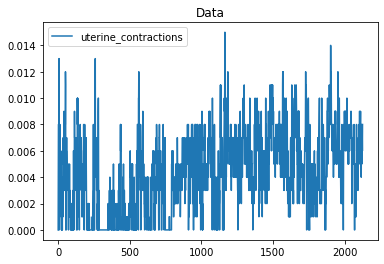

In [12]:
pd.DataFrame(df['uterine_contractions']).plot(title="Data")


In [13]:
# Split data to train and test
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df, y, random_state=42)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1594, 21), (532, 21), (1594,), (532,))

In [24]:
input_shape = X_train.shape
input_shape

(1594, 21)

In [29]:
# Build the model
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    # tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    # output are 3 (1,2 0r 3)
    tf.keras.layers.Dense(3, activation='softmax'),
])

# Compile the model
model_1.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fit the model
history_1 = model_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

Epoch 1/20


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "/usr/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 845, in launch_instance
      app.start()
    File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 612, in start
      self.io_loop.start()
    File "/usr/lib/python3/dist-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.9/asyncio/base_events.py", line 596, in run_forever
      self._run_once()
    File "/usr/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once
      handle._run()
    File "/usr/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/usr/lib/python3/dist-packages/tornado/ioloop.py", line 688, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "/usr/lib/python3/dist-packages/tornado/ioloop.py", line 741, in _run_callback
      ret = callback()
    File "/usr/lib/python3/dist-packages/tornado/gen.py", line 814, in inner
      self.ctx_run(self.run)
    File "/usr/lib/python3/dist-packages/tornado/gen.py", line 775, in run
      yielded = self.gen.send(value)
    File "/usr/lib/python3/dist-packages/ipykernel/kernelbase.py", line 362, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "/usr/lib/python3/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/lib/python3/dist-packages/ipykernel/kernelbase.py", line 265, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "/usr/lib/python3/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/lib/python3/dist-packages/ipykernel/kernelbase.py", line 540, in execute_request
      self.do_execute(
    File "/usr/lib/python3/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/lib/python3/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/usr/lib/python3/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 2886, in run_cell
      result = self._run_cell(
    File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 2932, in _run_cell
      return runner(coro)
    File "/usr/lib/python3/dist-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 3155, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 3347, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 3427, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-29-4f7129c8e459>", line 21, in <module>
      history_1 = model_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)
    File "/home/stephen/.local/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/stephen/.local/lib/python3.9/site-packages/keras/engine/training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/stephen/.local/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "/home/stephen/.local/lib/python3.9/site-packages/keras/engine/training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/stephen/.local/lib/python3.9/site-packages/keras/engine/training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "/home/stephen/.local/lib/python3.9/site-packages/keras/engine/training.py", line 1024, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/stephen/.local/lib/python3.9/site-packages/keras/engine/training.py", line 1082, in compute_loss
      return self.compiled_loss(
    File "/home/stephen/.local/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/stephen/.local/lib/python3.9/site-packages/keras/losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "/home/stephen/.local/lib/python3.9/site-packages/keras/losses.py", line 284, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/stephen/.local/lib/python3.9/site-packages/keras/losses.py", line 2098, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "/home/stephen/.local/lib/python3.9/site-packages/keras/backend.py", line 5633, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
Received a label value of 3 which is outside the valid range of [0, 3).  Label values: 1 1 3 2 1 1 1 2 1 3 3 1 1 2 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 2 1 1
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_4100]

In [31]:
# hot encode the output layer
y = tf.one_hot(y, depth=3)

In [32]:
y

<tf.Tensor: shape=(2126, 3), dtype=float32, numpy=
array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)>

In [35]:
# Resplit data 
# X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df, y, random_state=42)
y_train.shape, y_test.shape

y_train_2 = y[:1594]
y_test_2 = y[1594:]

In [36]:
y_test_2.shape

TensorShape([532, 3])

In [40]:
# Rebuild model 1
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    # tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    # output are 3 (1,2 0r 3)
    tf.keras.layers.Dense(3, activation='softmax'),
])

# Compile the model
model_2.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fit the model
history_2 = model_2.fit(
    X_train, y_train_2, validation_data=(X_test, y_test_2), epochs=40)


Epoch 1/40
50/50 [==============================] - 4s 24ms/step - loss: 80.6102 - accuracy: 0.1794 - val_loss: 52.2252 - val_accuracy: 0.0169
Epoch 2/40
50/50 [==============================] - 1s 12ms/step - loss: 30.0275 - accuracy: 0.1794 - val_loss: 16.2000 - val_accuracy: 0.0169
Epoch 3/40
50/50 [==============================] - 1s 11ms/step - loss: 5.8516 - accuracy: 0.3193 - val_loss: 0.2336 - val_accuracy: 0.7707
Epoch 4/40
50/50 [==============================] - 1s 14ms/step - loss: 0.7461 - accuracy: 0.7284 - val_loss: 0.4177 - val_accuracy: 0.6805
Epoch 5/40
50/50 [==============================] - 1s 14ms/step - loss: 0.6816 - accuracy: 0.6857 - val_loss: 0.4450 - val_accuracy: 0.6560
Epoch 6/40
50/50 [==============================] - 1s 12ms/step - loss: 0.6328 - accuracy: 0.6901 - val_loss: 0.2963 - val_accuracy: 0.7274
Epoch 7/40
50/50 [==============================] - 1s 11ms/step - loss: 0.6011 - accuracy: 0.7020 - val_loss: 0.4320 - val_accuracy: 0.6617
Epoch 8/4

<AxesSubplot:title={'center':'accuracy'}>

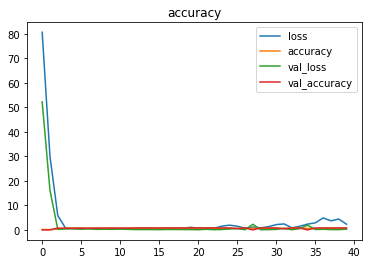

In [41]:
pd.DataFrame(history_2.history).plot(title="accuracy")

# Normalize the distribution

In [43]:
X_train.loc[0]

baseline value                                            120.0
accelerations                                               0.0
fetal_movement                                              0.0
uterine_contractions                                        0.0
light_decelerations                                         0.0
severe_decelerations                                        0.0
prolongued_decelerations                                    0.0
abnormal_short_term_variability                            73.0
mean_value_of_short_term_variability                        0.5
percentage_of_time_with_abnormal_long_term_variability     43.0
mean_value_of_long_term_variability                         2.4
histogram_width                                            64.0
histogram_min                                              62.0
histogram_max                                             126.0
histogram_number_of_peaks                                   2.0
histogram_number_of_zeroes              

In [52]:
# import sklearn classes for normalization, onehotencode
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    # turn all values in these columns between 0 and 1, usually for numeric values
    (MinMaxScaler(), ['baseline value', 'accelerations',
        'fetal_movement', 'uterine_contractions', 'light_decelerations', 
        'severe_decelerations', 'prolongued_decelerations', 'abnormal_short_term_variability', 
        'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability',
        'mean_value_of_long_term_variability', 'histogram_width', 'histogram_min', 'histogram_max', 
                      'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency']),
)

# # Create X and Y
# X = insurance.drop('charges', axis=1)
# y = insurance['charges']

# # Build our train and test sets
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42)

# Fit the column transformer to the training data
ct.fit(X_train)
# ct.fit(X_test)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [60]:
X_test_normal.shape

(532, 21)

In [67]:
# Rebuild model 2 on the normalized data
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    # output are 3 (1,2 0r 3)
    tf.keras.layers.Dense(3, activation='softmax'),
])

# Compile the model
model_3.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fit the model
history_3 = model_3.fit(
    X_train_normal, y_train_2, validation_data=(X_test_normal, y_test_2), epochs=20)


Epoch 1/20
50/50 [==============================] - 6s 24ms/step - loss: 0.7483 - accuracy: 0.7647 - val_loss: 0.3835 - val_accuracy: 0.8195
Epoch 2/20
50/50 [==============================] - 1s 18ms/step - loss: 0.5459 - accuracy: 0.7647 - val_loss: 0.2245 - val_accuracy: 0.8195
Epoch 3/20
50/50 [==============================] - 1s 16ms/step - loss: 0.5030 - accuracy: 0.7647 - val_loss: 0.2398 - val_accuracy: 0.8195
Epoch 4/20
50/50 [==============================] - 1s 14ms/step - loss: 0.4879 - accuracy: 0.7647 - val_loss: 0.2285 - val_accuracy: 0.8195
Epoch 5/20
50/50 [==============================] - 1s 19ms/step - loss: 0.4808 - accuracy: 0.7647 - val_loss: 0.2280 - val_accuracy: 0.8195
Epoch 6/20
50/50 [==============================] - 1s 15ms/step - loss: 0.4745 - accuracy: 0.7647 - val_loss: 0.2270 - val_accuracy: 0.8195
Epoch 7/20
50/50 [==============================] - 1s 21ms/step - loss: 0.4704 - accuracy: 0.7647 - val_loss: 0.2138 - val_accuracy: 0.8195
Epoch 8/20
50

<AxesSubplot:title={'center':'Normalized data'}>

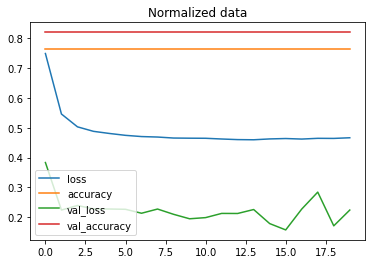

In [68]:
pd.DataFrame(history_3.history).plot(title="Normalized data")


In [70]:
tf.round(model_3.predict(X_test_normal))


17/17 [==============================] - 0s 8ms/step


<tf.Tensor: shape=(532, 3), dtype=float32, numpy=
array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)>

In [71]:
y_test

282     1.0
1999    1.0
1709    1.0
988     1.0
2018    1.0
       ... 
746     1.0
1717    1.0
1782    1.0
123     1.0
1779    1.0
Name: fetal_health, Length: 532, dtype: float64

In [86]:
y[:10]

<tf.Tensor: shape=(10, 3), dtype=float32, numpy=
array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

In [87]:
# Build the model
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    # tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    # output are 3 (1,2 0r 3)
    tf.keras.layers.Dense(3, activation='softmax'),
])

# Compile the model
model_1.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fit the model
history_1 = model_1.fit(
    X_train_normal, y_train, validation_data=(X_test_normal, y_test), epochs=20)


Epoch 1/20


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "/usr/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 845, in launch_instance
      app.start()
    File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 612, in start
      self.io_loop.start()
    File "/usr/lib/python3/dist-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.9/asyncio/base_events.py", line 596, in run_forever
      self._run_once()
    File "/usr/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once
      handle._run()
    File "/usr/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/usr/lib/python3/dist-packages/tornado/ioloop.py", line 688, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "/usr/lib/python3/dist-packages/tornado/ioloop.py", line 741, in _run_callback
      ret = callback()
    File "/usr/lib/python3/dist-packages/tornado/gen.py", line 814, in inner
      self.ctx_run(self.run)
    File "/usr/lib/python3/dist-packages/tornado/gen.py", line 775, in run
      yielded = self.gen.send(value)
    File "/usr/lib/python3/dist-packages/ipykernel/kernelbase.py", line 362, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "/usr/lib/python3/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/lib/python3/dist-packages/ipykernel/kernelbase.py", line 265, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "/usr/lib/python3/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/lib/python3/dist-packages/ipykernel/kernelbase.py", line 540, in execute_request
      self.do_execute(
    File "/usr/lib/python3/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/lib/python3/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/usr/lib/python3/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 2886, in run_cell
      result = self._run_cell(
    File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 2932, in _run_cell
      return runner(coro)
    File "/usr/lib/python3/dist-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 3155, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 3347, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 3427, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-87-b3cd833233a0>", line 21, in <module>
      history_1 = model_1.fit(
    File "/home/stephen/.local/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/stephen/.local/lib/python3.9/site-packages/keras/engine/training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/stephen/.local/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "/home/stephen/.local/lib/python3.9/site-packages/keras/engine/training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/stephen/.local/lib/python3.9/site-packages/keras/engine/training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "/home/stephen/.local/lib/python3.9/site-packages/keras/engine/training.py", line 1024, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/stephen/.local/lib/python3.9/site-packages/keras/engine/training.py", line 1082, in compute_loss
      return self.compiled_loss(
    File "/home/stephen/.local/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/stephen/.local/lib/python3.9/site-packages/keras/losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "/home/stephen/.local/lib/python3.9/site-packages/keras/losses.py", line 284, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/stephen/.local/lib/python3.9/site-packages/keras/losses.py", line 2098, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "/home/stephen/.local/lib/python3.9/site-packages/keras/backend.py", line 5633, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
Received a label value of 3 which is outside the valid range of [0, 3).  Label values: 1 1 3 2 1 1 1 2 1 3 3 1 1 2 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 2 1 1
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_100766]

In [89]:
y_2 = tf.keras.utils.to_categorical(y, num_classes=3)

y_2[:10]


array([[[1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.]],

       [[1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.]],

       [[1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.]],

       [[1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.]],

       [[1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.]],

       [[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]],

       [[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]],

       [[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]],

       [[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]],

       [[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]]], dtype=float32)

In [90]:
df2 = pd.read_csv("fetal_health.csv")


In [91]:
y2 = df2.pop("fetal_health")


In [95]:
y2[:10]

0    2.0
1    1.0
2    1.0
3    1.0
4    1.0
5    3.0
6    3.0
7    3.0
8    3.0
9    3.0
Name: fetal_health, dtype: float64

In [94]:
y2_1 = tf.keras.utils.to_categorical(y2, num_classes=2)

y2_1


IndexError: index 2 is out of bounds for axis 1 with size 2